# Question 4 (Homework 4 part (b))

For this question, you need to write an implementation of Poisson regression with maximum likelihood approach using the gradient descent algorithm. The dataset for this question corresponds to the Las Vegas daily accident count data. Your task is to predict the number of crashes on a given day based on 4 predictor attributes: day of the week, holiday, weather, and average number of crashes in the past 2 days. You will need to train a Poisson regression model to minimize the negative log-likelihood function given in Equation (1) of question 4(a) and compare its performance to multiple linear regression.

The code must be written using only the built-in functions in standard python as well as functions provided by the numpy and pandas libraries. You may also use the train_test_split() function in scikit-learn for this homework. All other functions in the scikit-learn library are prohibited (except for multiple linear regression). If you're unsure whether you can use other functions/libraries, please contact the instructor.

Follow the step-by-step procedure given in this tempate. Rename the template file to yourlastname.ipynb and submit the Jupyter notebook along with its HTML version (by choosing File -> Download as HTML on the menu option). 

### A. DATA LOADING AND PREPROCESSING

**Step 1:** Download the *crash_data.csv* file from D2L. Load the data file into a pandas DataFrame object and display its content.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/crash_data.csv')
data

,Crash_Date,Count,DayOfWeek,Holiday,Weather,Avg2days
0,1/1/2016,38,4,1,0,37.0
1,1/2/2016,22,5,0,0,36.0
2,1/3/2016,22,6,0,0,30.0
3,1/4/2016,47,0,0,1,22.0
4,1/5/2016,63,1,0,1,34.5
...,...,...,...,...,...,...
361,12/27/2016,33,1,0,0,25.5
362,12/28/2016,37,2,0,0,30.5
363,12/29/2016,41,3,0,0,35.0
364,12/30/2016,40,4,0,1,39.0


**(b)** Extract the Count column of the dataframe object and use it as the target variable to be predicted. The target variable corresponds to the number of crashes on a given day. Plot a histogram to depict the distribution of the target variable. **Note:** The histogram below is for illustrative purposes only. Make sure you label the x- and y-axes accordingly.

In [ ]:
data['Count']

0      38
1      22
2      22
3      47
4      63
       ..
361    33
362    37
363    41
364    40
365    34
Name: Count, Length: 366, dtype: int64

In [ ]:
#Extract the Count column of the dataframe object and use it as the target variable to be predicted.
y = data.Count

Text(0.5, 0, 'Number of Crashes')

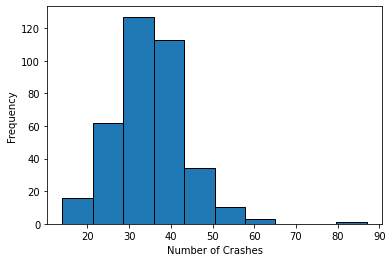

In [ ]:
#Plot a histogram to depict the distribution of the target variable
plot = data['Count'].plot(kind='hist', edgecolor='black')
plot.set_ylabel("Frequency")
plot.set_xlabel("Number of Crashes")

**(c)** Extract a numpy array of the predictor attributes X from the last 4 columns of the dataframe by excluding the first 2 columns (Crash_Date and Count). Standardize the Avg2days column by subtracting the value in the column with its corresponding column mean and dividing it by the column's standard deviation. Do not standardize other columns (DayOfWeek, Holiday, and Weather). Append a column of 1s as the last column of the predictor matrix X to represent the model bias (intercept term). Display the resulting matrix.

In [ ]:
#Extract a numpy array of the predictor attributes X from the last 4 columns 
X = data.iloc[:,2:] #extract class
print(X)

     DayOfWeek  Holiday  Weather  Avg2days
0            4        1        0      37.0
1            5        0        0      36.0
2            6        0        0      30.0
3            0        0        1      22.0
4            1        0        1      34.5
..         ...      ...      ...       ...
361          1        0        0      25.5
362          2        0        0      30.5
363          3        0        0      35.0
364          4        0        1      39.0
365          5        0        1      40.5

[366 rows x 4 columns]


In [ ]:
# Standardize the Avg2days column
X['Avg2days'] = (X['Avg2days'] - X['Avg2days'].mean())/X['Avg2days'].std()

X['Avg2days']

0      0.350285
1      0.194318
2     -0.741478
3     -1.989208
4     -0.039631
         ...   
361   -1.443326
362   -0.663495
363    0.038352
364    0.662217
365    0.896166
Name: Avg2days, Length: 366, dtype: float64

In [ ]:
#Append a column of 1s as the last column
X.insert(4, "Ones", 1)

In [ ]:
X = X.values

In [ ]:
#Display matrix
X

array([[ 4.        ,  1.        ,  0.        ,  0.35028461,  1.        ],
       [ 5.        ,  0.        ,  0.        ,  0.19431847,  1.        ],
       [ 6.        ,  0.        ,  0.        , -0.74147838,  1.        ],
       ...,
       [ 3.        ,  0.        ,  0.        ,  0.03835233,  1.        ],
       [ 4.        ,  0.        ,  1.        ,  0.6622169 ,  1.        ],
       [ 5.        ,  0.        ,  1.        ,  0.89616611,  1.        ]])

**(d)** Divide the data into a separate training and test set. You may use the scikit-learn train_test_split function to do this. You should reserve 75% of the data for training and the remaining 25% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
#np.hstack((X,np.ones([X.shape[0],1], X.dtype)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=1)

print('Training set: X.shape = ', X_train.shape, ' y.shape = ', y_train.shape )
print('Test set: X.shape = ', X_test.shape, ' y.shape = ', y_test.shape )

Training set: X.shape =  (274, 5)  y.shape =  (274,)
Test set: X.shape =  (92, 5)  y.shape =  (92,)


### B. MODEL BUILDING AND EVALUATION

**Step 2** Poisson Regression

**(a)** Create a class for the poisson regression model. There are 2 functions in this class: *fit* and *predict*. The *fit* function will estimate parameters of the Poisson regression model from the input training data whereas the *predict* function will apply the model to the given test data. 

In [ ]:
import math
import numpy as np

class PoissonRegress:
  
        def __init__(self):
          self.w = np.zeros(5)

        def fit(self, X, y, lr=0.001, maxiter=50000):
            """
             This function will take as input the training data (X, y), learning rate (lr) and maximum number of 
             iterations (maxiter). It will apply the gradient descent algorithm to learn the model parameters. Use 
             the gradient of the negative log-likelihood function from question 4(a) for the gradient descent 
             update formula:             
                                 w(k) = w(k-1) - lr/N * gradient(NLL)

             where N is the number of training examples. You must also compute the loss in each iteration and plot
             its value after each iteration to demonstrate its convergence. Note: you may ignore the log y! term 
             when calculating the loss since it is independent of the model parameter w.
            """ 
            N = len(X)
            fin_loss = []
            w = self.w

            for i in range(maxiter):
              NLL = 0
              loss = 0
              for j in range(N):
                NLL += np.dot((math.e**(np.dot(w.T, X[j]))-y[j]), X[j])
                loss -= (y[j] * np.dot(w.T, X[j]) + math.e**(np.dot(w.T, X[j])))
              fin_loss.append(loss)
              w = w - (lr/N)*NLL
            self.w = w
            return fin_loss
              


        def predict(self, X):
            """
             This function will take as input the test data X and returns the predicted value of the Poisson
             regression model. 
            """ 
            n = len(X)
            y_pred = []

            for i in range(n):
              y = math.e**(np.dot(self.w.T, X[i]))
              y_pred.append(y)

            return y_pred
          


**(b):** Fit the Poisson regression model to the input training data. Set the learning rate parameter to be 0.001 and maximum iteration of the gradient descent to be 7000. Plot the negative log-likelihood function against the number of iterations (epochs) to show its convergence. Display also the resulting model parameters. 

In [ ]:
X_train

array([[ 4.        ,  0.        ,  0.        , -0.11761381,  1.        ],
       [ 0.        ,  0.        ,  0.        , -1.05341067,  1.        ],
       [ 5.        ,  0.        ,  1.        ,  0.89616611,  1.        ],
       ...,
       [ 6.        ,  0.        ,  0.        ,  1.44204761,  1.        ],
       [ 1.        ,  0.        ,  0.        , -0.66349531,  1.        ],
       [ 6.        ,  0.        ,  0.        ,  0.97414918,  1.        ]])

In [ ]:
y_train = y_train.values

In [ ]:
y_train

array([44, 36, 34, 40, 20, 32, 24, 33, 29, 43, 46, 34, 23, 43, 41, 32, 37,
       26, 41, 40, 26, 18, 35, 44, 36, 26, 41, 38, 42, 14, 39, 36, 27, 30,
       16, 30, 24, 38, 32, 40, 40, 39, 49, 41, 43, 48, 20, 41, 61, 37, 33,
       41, 28, 31, 26, 32, 28, 29, 30, 34, 38, 35, 23, 33, 32, 27, 26, 32,
       37, 19, 38, 29, 22, 34, 63, 35, 29, 44, 33, 39, 33, 32, 36, 46, 31,
       30, 47, 40, 41, 35, 36, 27, 18, 36, 39, 25, 23, 48, 36, 41, 32, 41,
       31, 22, 28, 39, 37, 45, 32, 41, 31, 26, 32, 33, 29, 34, 44, 30, 31,
       19, 39, 30, 35, 27, 31, 31, 50, 26, 31, 48, 38, 36, 46, 41, 34, 39,
       27, 30, 37, 44, 37, 36, 28, 34, 38, 36, 34, 40, 28, 38, 39, 32, 37,
       20, 23, 26, 26, 35, 25, 44, 56, 33, 53, 29, 34, 37, 41, 40, 35, 34,
       43, 33, 30, 48, 33, 32, 27, 22, 34, 38, 41, 37, 30, 23, 33, 34, 41,
       31, 33, 23, 35, 22, 33, 35, 23, 26, 35, 32, 35, 28, 43, 41, 43, 28,
       34, 46, 40, 37, 33, 29, 30, 32, 30, 38, 53, 40, 35, 52, 34, 33, 15,
       34, 33, 52, 29, 20

In [ ]:
model = PoissonRegress()
loss = model.fit(X_train, y_train, lr=1e-3, maxiter=7000)
print('Model parameters:')
print(model.w[:])

Model parameters:
[-0.03494709 -0.29136196  0.12976003  0.04435076  3.64114414]


Model coefficients: [-0.03494709 -0.29136196  0.12976003  0.04435076  3.64114414]
Model intercept: 7000


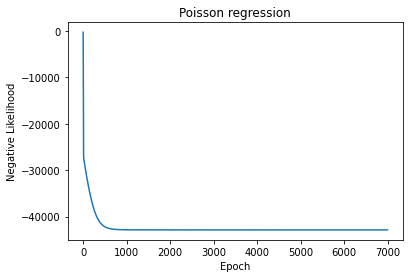

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(loss)
plt.title('Poisson regression')
plt.ylabel('Negative Likelihood')
plt.xlabel('Epoch')
print('Model coefficients:', model.w[:])
maxiter = 7000
print('Model intercept:', maxiter)

**(c)** Apply the model to the test data. Compute the root mean square error and draw a scatter plot to display the true and predicted values.

In [ ]:
y_actual = y_test
y_pred = model.predict(X_test)

In [ ]:

err = np.square(np.subtract(y_actual,y_pred)).mean() 
 
rms = math.sqrt(err)
print("Root Mean Square Error:\n")
print(rms)

Root Mean Square Error:

8.303227345246173


Text(0, 0.5, 'Predicted Value')

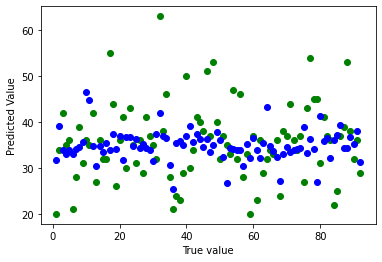

In [ ]:
res = np.array(range(1, len(y_test)+1))
plt.scatter(res, y_actual, color = 'green')
plt.scatter(res, y_pred, color = 'blue')
plt.xlabel('True value')
plt.ylabel('Predicted Value')

**(d)** Compare the results against multiple linear regression. You can use scikit-learn implementation of multipmole linear regression for this problem. Display the model parameter including its intercept. Compute the root mean squared error of the model when applied to the test set and draw a scatter plot to display the true and predicted value of the model. 

(Poisson) Root mean squared error =  8.227888348673382


Text(0, 0.5, 'Predicted Value')

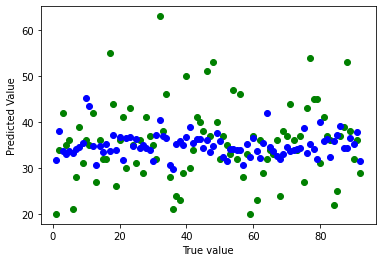

In [ ]:
from sklearn.linear_model import PoissonRegressor
reg = PoissonRegressor().fit(X_train, y_train)
y_pred = reg.predict(X_test)

err = np.square(np.subtract(y_test,y_pred)).mean() 
rms = math.sqrt(err)

print("(Poisson) Root mean squared error = ", rms)
res = np.array(range(1, len(y_test)+1))

plt.scatter(res, y_actual, color = 'green')
plt.scatter(res, y_pred, color = 'blue')
plt.xlabel('True value')
plt.ylabel('Predicted Value')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
#print(lr.intercept_)
#print(lr.coef_)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("(Linear Regression) Root mean squared error = ", rmse)

(Linear Regression) Root mean squared error =  8.240728340270824


Text(0, 0.5, 'Predicted Value')

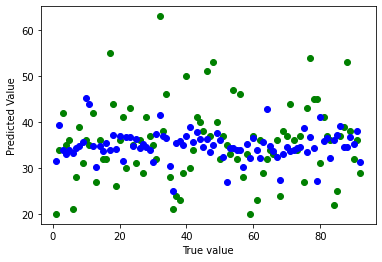

In [ ]:
plt.scatter(res, y_actual, color = 'green')
plt.scatter(res, y_pred, color = 'blue')
plt.xlabel('True value')
plt.ylabel('Predicted Value')